# Questions to analyse with this dataset

* Who borrowed loan most? (top 5 employment status)
* What is the ration of the being home owners?
* Loan status by term
* Which month did they borrow most?
* which year did they borrow most?
* which day did they borrow most?
* What is the current loan status?
* Which states borrowed most?
* What is the sum of borrower rate per term?
* Top 5 occupation by income range
* least 5 occupation by income range
* The relationship between LoanStatus, 'ListingCategory (numeric)', 'LoanOriginalAmount'
* Is there any relationship between the borrower's annual percentage rate (BorrowerAPR) and their stated monthly income (StatedMonthlyIncome)?
* How does the borrower's employment status (EmploymentStatus) affect their loan status (LoanStatus)? Are there certain employment statuses associated with higher rates of loan default or completion?
* How does the borrower's stated monthly income (StatedMonthlyIncome) vary across different loan statuses (LoanStatus)? Are there differences in income levels for borrowers with different loan outcomes?
* How does the borrower's credit grade (CreditGrade) or credit score (if available) correlate with their loan status (LoanStatus) or loan outcome?
* Is there a relationship between the debt-to-income ratio (DebtToIncomeRatio) and loan outcomes (LoanStatus)? Do borrowers with higher debt-to-income ratios tend to have different loan outcomes compared to those with lower ratios?
* Are there any geographical patterns in loan origination? For example, how does the distribution of borrowers vary across different states (BorrowerState)?
* What is the distribution of loan amounts (LoanOriginalAmount) across different income ranges (IncomeRange)? Are there any noticeable trends in borrowing behavior based on income level?

# Importing the libraries and running the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loandata = pd.read_csv("loandata_sql.csv")
loandata

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,...,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,FirstRecordedCreditLine,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
0,36,Completed,3083.333333,0.16516,0.1580,CO,0,Self-employed,True,"$25,000-49,999",...,0.0,0.0,0.00,78,2001-10-11 00:00:00,12.0,1,24,0.0,0
1,36,Current,6125.000000,0.12016,0.0920,CO,2,Employed,False,"$50,000-74,999",...,1.0,3989.0,0.21,0,1996-03-18 00:00:00,29.0,13,389,0.0,0
2,36,Completed,2083.333333,0.28269,0.2750,GA,0,Not available,False,Not displayed,...,0.0,NaN,NaN,86,2002-07-27 00:00:00,3.0,0,0,NaN,0
3,36,Current,2875.000000,0.12528,0.0974,GA,16,Employed,True,"$25,000-49,999",...,0.0,1444.0,0.04,16,1983-02-28 00:00:00,29.0,7,115,0.0,0
4,36,Current,9583.333333,0.24614,0.2085,MN,2,Employed,True,"$100,000+",...,0.0,6193.0,0.81,6,2004-02-20 00:00:00,49.0,6,220,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,4333.333333,0.22354,0.1864,IL,1,Employed,True,"$50,000-74,999",...,1.0,7714.0,0.80,11,1997-09-01 00:00:00,41.0,9,209,0.0,0
113933,36,FinalPaymentInProgress,8041.666667,0.13220,0.1110,PA,7,Employed,True,"$75,000-99,999",...,0.0,15743.0,0.69,28,1992-01-17 00:00:00,39.0,9,495,0.0,0
113934,60,Current,2875.000000,0.23984,0.2150,TX,1,Employed,True,"$25,000-49,999",...,0.0,22147.0,0.73,3,2002-02-25 00:00:00,25.0,9,521,0.0,0
113935,60,Completed,3875.000000,0.28408,0.2605,GA,2,Full-time,True,"$25,000-49,999",...,1.0,11956.0,0.69,28,1993-12-01 00:00:00,22.0,7,488,0.0,0


In [3]:
loandata.head(5)

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,...,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,FirstRecordedCreditLine,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
0,36,Completed,3083.333333,0.16516,0.1580,CO,0,Self-employed,True,"$25,000-49,999",...,0.0,0.0,0.00,78,2001-10-11 00:00:00,12.0,1,24,0.0,0
1,36,Current,6125.000000,0.12016,0.0920,CO,2,Employed,False,"$50,000-74,999",...,1.0,3989.0,0.21,0,1996-03-18 00:00:00,29.0,13,389,0.0,0
2,36,Completed,2083.333333,0.28269,0.2750,GA,0,Not available,False,Not displayed,...,0.0,NaN,NaN,86,2002-07-27 00:00:00,3.0,0,0,NaN,0
3,36,Current,2875.000000,0.12528,0.0974,GA,16,Employed,True,"$25,000-49,999",...,0.0,1444.0,0.04,16,1983-02-28 00:00:00,29.0,7,115,0.0,0
4,36,Current,9583.333333,0.24614,0.2085,MN,2,Employed,True,"$100,000+",...,0.0,6193.0,0.81,6,2004-02-20 00:00:00,49.0,6,220,0.0,0


In [4]:
loandata.tail(5)

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,...,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,FirstRecordedCreditLine,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
113932,36,Current,4333.333333,0.22354,0.1864,IL,1,Employed,True,"$50,000-74,999",...,1.0,7714.0,0.80,11,1997-09-01 00:00:00,41.0,9,209,0.0,0
113933,36,FinalPaymentInProgress,8041.666667,0.13220,0.1110,PA,7,Employed,True,"$75,000-99,999",...,0.0,15743.0,0.69,28,1992-01-17 00:00:00,39.0,9,495,0.0,0
113934,60,Current,2875.000000,0.23984,0.2150,TX,1,Employed,True,"$25,000-49,999",...,0.0,22147.0,0.73,3,2002-02-25 00:00:00,25.0,9,521,0.0,0
113935,60,Completed,3875.000000,0.28408,0.2605,GA,2,Full-time,True,"$25,000-49,999",...,1.0,11956.0,0.69,28,1993-12-01 00:00:00,22.0,7,488,0.0,0
113936,36,Current,4583.333333,0.13189,0.1039,NY,1,Employed,False,"$50,000-74,999",...,1.0,6166.0,0.80,2,1995-01-01 00:00:00,44.0,8,289,0.0,0


In [5]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   StatedMonthlyIncome          113937 non-null  float64
 3   BorrowerAPR                  113912 non-null  float64
 4   BorrowerRate                 113937 non-null  float64
 5   BorrowerState                108422 non-null  object 
 6   ListingCategory (numeric)    113937 non-null  int64  
 7   EmploymentStatus             111682 non-null  object 
 8   IsBorrowerHomeowner          113937 non-null  bool   
 9   IncomeRange                  113937 non-null  object 
 10  Occupation                   110349 non-null  object 
 11  DebtToIncomeRatio            105383 non-null  float64
 12  TotalProsperLoans            22085 non-null   float64
 13 

In [6]:
loandata.describe()

,Term,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,ListingCategory (numeric),DebtToIncomeRatio,TotalProsperLoans,LoanOriginalAmount,Investors,loan year,...,CurrentDelinquencies,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
count,113937.000000,1.139370e+05,113912.000000,113937.000000,113937.000000,105383.000000,22085.000000,113937.00000,113937.000000,113937.000000,...,113240.000000,113240.000000,1.063330e+05,106333.000000,113937.000000,113240.000000,113937.00000,113937.000000,106333.000000,113937.000000
mean,40.830248,5.608026e+03,0.218828,0.192764,2.774209,0.275947,1.421100,8337.01385,80.475228,2011.042611,...,0.592052,0.312646,1.759871e+04,0.561309,31.896882,26.754539,6.96979,398.292161,0.015094,0.048027
std,10.436212,7.478497e+03,0.080364,0.074818,3.996797,0.551759,0.764042,6245.80058,103.239020,2.506634,...,1.978707,0.727868,3.293640e+04,0.317918,29.974184,13.637871,4.63097,447.159711,0.154092,0.332353
min,12.000000,0.000000e+00,0.006530,0.000000,0.000000,0.000000,0.000000,1000.00000,1.000000,2005.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000
25%,36.000000,3.200333e+03,0.156290,0.134000,1.000000,0.140000,1.000000,4000.00000,2.000000,2008.000000,...,0.000000,0.000000,3.121000e+03,0.310000,6.000000,17.000000,4.00000,114.000000,0.000000,0.000000
50%,36.000000,4.666667e+03,0.209760,0.184000,1.000000,0.220000,1.000000,6500.00000,44.000000,2012.000000,...,0.000000,0.000000,8.549000e+03,0.600000,21.000000,25.000000,6.00000,271.000000,0.000000,0.000000
75%,36.000000,6.825000e+03,0.283810,0.250000,3.000000,0.320000,2.000000,12000.00000,115.000000,2013.000000,...,0.000000,0.000000,1.952100e+04,0.840000,65.000000,35.000000,9.00000,525.000000,0.000000,0.000000
max,60.000000,1.750003e+06,0.512290,0.497500,20.000000,10.010000,8.000000,35000.00000,1189.000000,2014.000000,...,83.000000,38.000000,1.435667e+06,5.950000,100.000000,136.000000,51.00000,14985.000000,20.000000,39.000000


In [7]:
loandata.shape

(113937, 32)

In [8]:
#Checking for the count of duplicate value
loandata.duplicated().sum()

871

In [12]:
loandata.drop_duplicates(inplace=True)

In [13]:
loandata.duplicated().sum()

0

In [21]:
loandata.shape

(113066, 32)

In [14]:
loandata.isnull()

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,...,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,FirstRecordedCreditLine,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
loandata.isna().sum()

Term                               0
LoanStatus                         0
StatedMonthlyIncome                0
BorrowerAPR                       25
BorrowerRate                       0
BorrowerState                   5515
ListingCategory (numeric)          0
EmploymentStatus                2255
IsBorrowerHomeowner                0
IncomeRange                        0
Occupation                      3529
DebtToIncomeRatio               8472
TotalProsperLoans              91143
LoanOriginalAmount                 0
Investors                          0
LoanOriginationDate                0
loan year                          0
loan month                         0
loan day                           0
CreditGrade                    84113
TotalInquiries                  1159
CurrentDelinquencies             697
PublicRecordsLast10Years         697
RevolvingCreditBalance          7604
BankcardUtilization             7604
LoanMonthsSinceOrigination         0
FirstRecordedCreditLine          697
T

In [16]:
loandata.isna()

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,...,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,FirstRecordedCreditLine,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
loandata.columns

Index(['Term', 'LoanStatus', 'StatedMonthlyIncome', 'BorrowerAPR',
       'BorrowerRate', 'BorrowerState', 'ListingCategory (numeric)',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'Occupation',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'LoanOriginalAmount',
       'Investors', 'LoanOriginationDate', 'loan year', 'loan month',
       'loan day', 'CreditGrade', 'TotalInquiries', 'CurrentDelinquencies',
       'PublicRecordsLast10Years', 'RevolvingCreditBalance',
       'BankcardUtilization', 'LoanMonthsSinceOrigination',
       'FirstRecordedCreditLine', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'PublicRecordsLast12Months', 'Recommendations'],
      dtype='object')

In [18]:
#checking for unique values
loandata.nunique()

Term                               3
LoanStatus                        12
StatedMonthlyIncome            13502
BorrowerAPR                     6677
BorrowerRate                    2294
BorrowerState                     51
ListingCategory (numeric)         21
EmploymentStatus                   8
IsBorrowerHomeowner                2
IncomeRange                        8
Occupation                        67
DebtToIncomeRatio               1207
TotalProsperLoans                  9
LoanOriginalAmount              2468
Investors                        751
LoanOriginationDate             1873
loan year                         10
loan month                        12
loan day                           5
CreditGrade                        8
TotalInquiries                   102
CurrentDelinquencies              47
PublicRecordsLast10Years          25
RevolvingCreditBalance         38555
BankcardUtilization              201
LoanMonthsSinceOrigination        94
FirstRecordedCreditLine        11585
T

In [19]:
#summary of all the data descriptive info

def check (df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique= df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=["column", "dtypes", "nunique","sum_null"]
    return df_check
check(loandata)

,column,dtypes,nunique,sum_null
0,Term,int64,3,0
1,LoanStatus,object,12,0
2,StatedMonthlyIncome,float64,13502,0
3,BorrowerAPR,float64,6677,25
4,BorrowerRate,float64,2294,0
5,BorrowerState,object,51,5515
6,ListingCategory (numeric),int64,21,0
7,EmploymentStatus,object,8,2255
8,IsBorrowerHomeowner,bool,2,0
9,IncomeRange,object,8,0


In [22]:
loandata.head(5)

,Term,LoanStatus,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,BorrowerState,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeRange,...,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,LoanMonthsSinceOrigination,FirstRecordedCreditLine,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PublicRecordsLast12Months,Recommendations
0,36,Completed,3083.333333,0.16516,0.1580,CO,0,Self-employed,True,"$25,000-49,999",...,0.0,0.0,0.00,78,2001-10-11 00:00:00,12.0,1,24,0.0,0
1,36,Current,6125.000000,0.12016,0.0920,CO,2,Employed,False,"$50,000-74,999",...,1.0,3989.0,0.21,0,1996-03-18 00:00:00,29.0,13,389,0.0,0
2,36,Completed,2083.333333,0.28269,0.2750,GA,0,Not available,False,Not displayed,...,0.0,NaN,NaN,86,2002-07-27 00:00:00,3.0,0,0,NaN,0
3,36,Current,2875.000000,0.12528,0.0974,GA,16,Employed,True,"$25,000-49,999",...,0.0,1444.0,0.04,16,1983-02-28 00:00:00,29.0,7,115,0.0,0
4,36,Current,9583.333333,0.24614,0.2085,MN,2,Employed,True,"$100,000+",...,0.0,6193.0,0.81,6,2004-02-20 00:00:00,49.0,6,220,0.0,0


# DATA ANALYSIS (EDA)

1. Top 5 loan borrower by their employment status

In [23]:
#calculating the top 5 people who borrowed money by their employments status
status = loandata["EmploymentStatus"].value_counts()
top_status = status.head(5)
#Get the top 5 employment statuses with the highest number of loans
top_status

EmploymentStatus
Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Name: count, dtype: int64

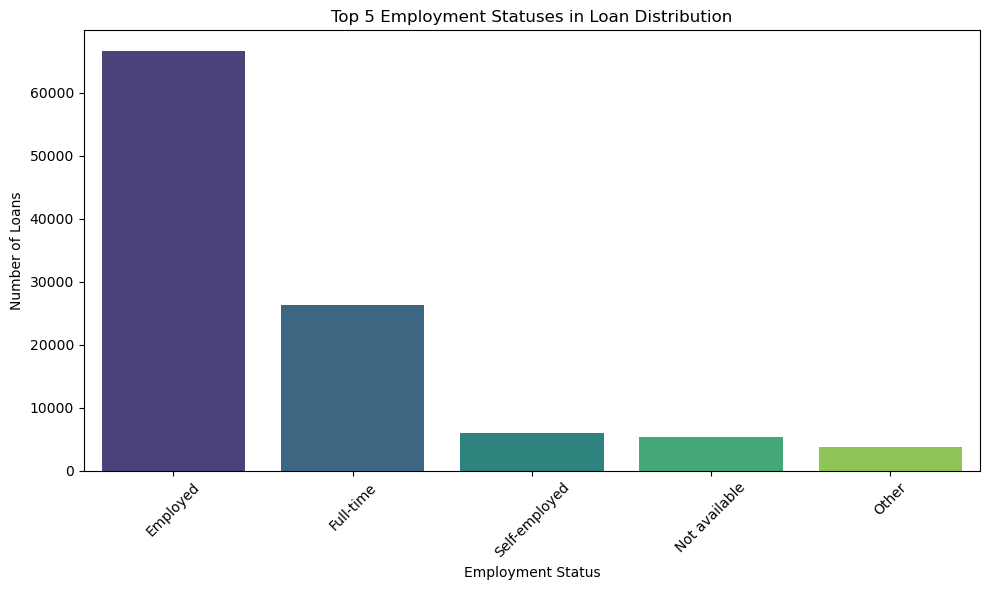

In [24]:
# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_status.index, y=top_status.values, palette="viridis")
plt.title("Top 5 Employment Statuses in Loan Distribution")
plt.xlabel("Employment Status")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. What is the ration of the being home owners?

In [25]:
#total homeowenrs
homeowners = loandata["IsBorrowerHomeowner"].value_counts()
homeowners

IsBorrowerHomeowner
True     57052
False    56014
Name: count, dtype: int64

In [26]:
# Calculating the percentage of loan customers who are homeowners
total_customers = len(loandata)
homeowners = loandata["IsBorrowerHomeowner"].value_counts()
homeowners_percentage = (homeowners / total_customers) * 100

# Print the percentage of loan customers who are homeowners
print("Percentage of Loan Customers who are Homeowners:", homeowners_percentage)


Percentage of Loan Customers who are Homeowners: IsBorrowerHomeowner
True     50.459024
False    49.540976
Name: count, dtype: float64


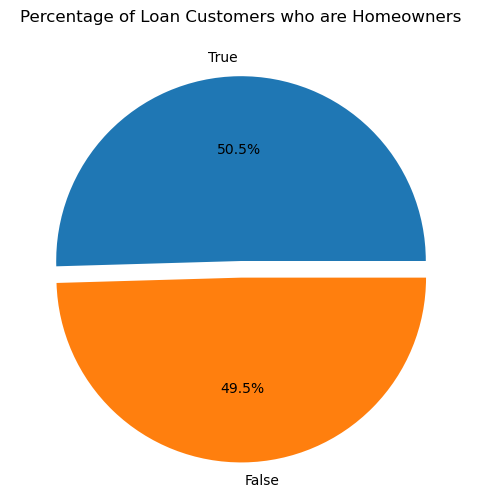

In [27]:
# Visualize the percentage of loan customers who are homeowners 
plt.figure(figsize=(6, 6))
plt.pie(homeowners_percentage, labels=homeowners_percentage.index, autopct='%1.1f%%', explode= [0,0.09])
plt.title("Percentage of Loan Customers who are Homeowners")
plt.show()

3. Loan status by term 

In [28]:
loan_status = loandata["LoanStatus"].value_counts()
loanstatus = loan_status.head(5)
loanstatus

LoanStatus
Current                 55730
Completed               38061
Chargedoff              11992
Defaulted                5018
Past Due (1-15 days)      800
Name: count, dtype: int64

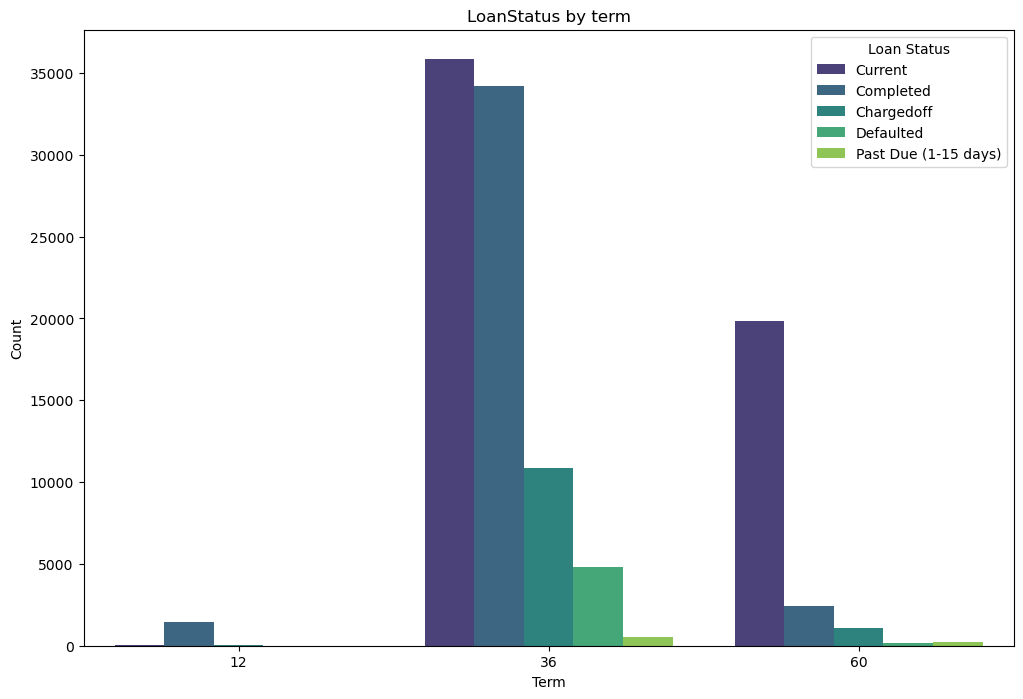

In [29]:
# Calculate the top 5 loan statuses
loan_status = loandata["LoanStatus"].value_counts().head(5)

# Create the count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=loandata, x='Term', hue='LoanStatus', palette='viridis', hue_order=loan_status.index[::1])
plt.title('LoanStatus by term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')  # Adjust the legend location as needed
plt.show()

4. Which month did they borrow most?

In [30]:
month_count = loandata["loan month"].value_counts()
month = month_count.head(5)
month

loan month
January     11205
October     10919
December    10582
August       9592
February     9557
Name: count, dtype: int64

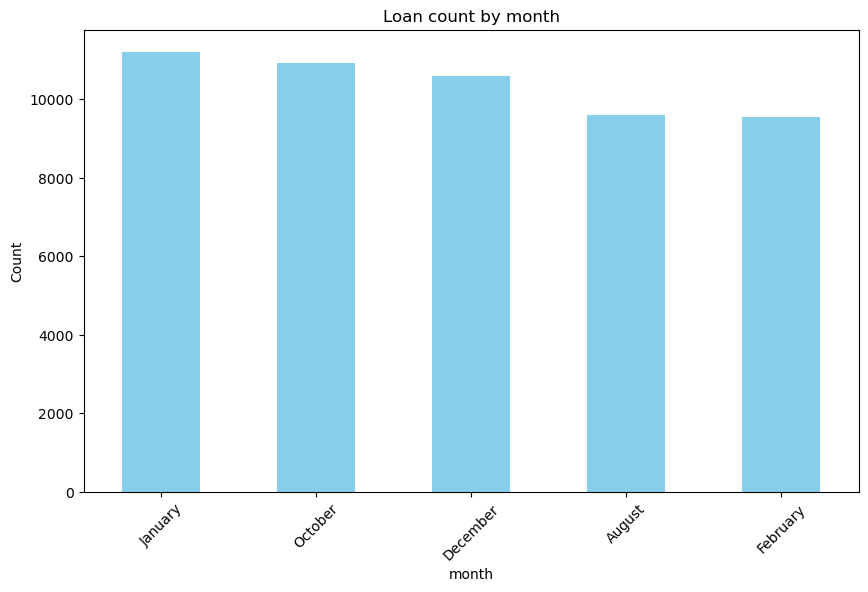

In [31]:
plt.figure(figsize=(10, 6))
month.plot(kind='bar', color='skyblue')
plt.title('Loan count by month')
plt.xlabel('month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

5. which year did they borrow most?

In [32]:
#calculating the top 5 years most borrowed
year_count = loandata["loan year"].value_counts()
year = year_count.head(5)
year

loan year
2013    33912
2012    19553
2014    11734
2008    11552
2007    11460
Name: count, dtype: int64

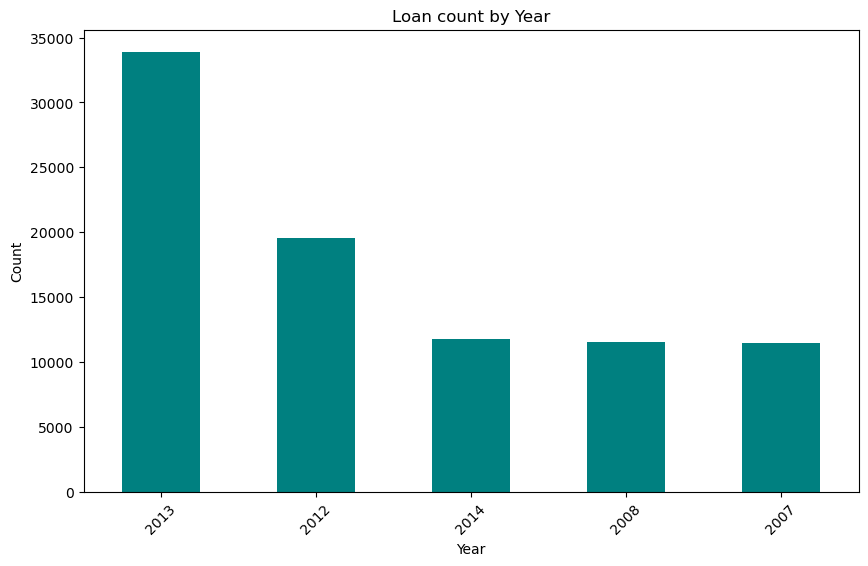

In [33]:
plt.figure(figsize=(10, 6))
year.plot(kind='bar', color='#008080')
plt.title('Loan count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

6. What is the current loan status?

In [34]:
#calculating the top 5 status of the loan
loan_status = loandata["LoanStatus"].value_counts().head(5)
loan_status

LoanStatus
Current                 55730
Completed               38061
Chargedoff              11992
Defaulted                5018
Past Due (1-15 days)      800
Name: count, dtype: int64

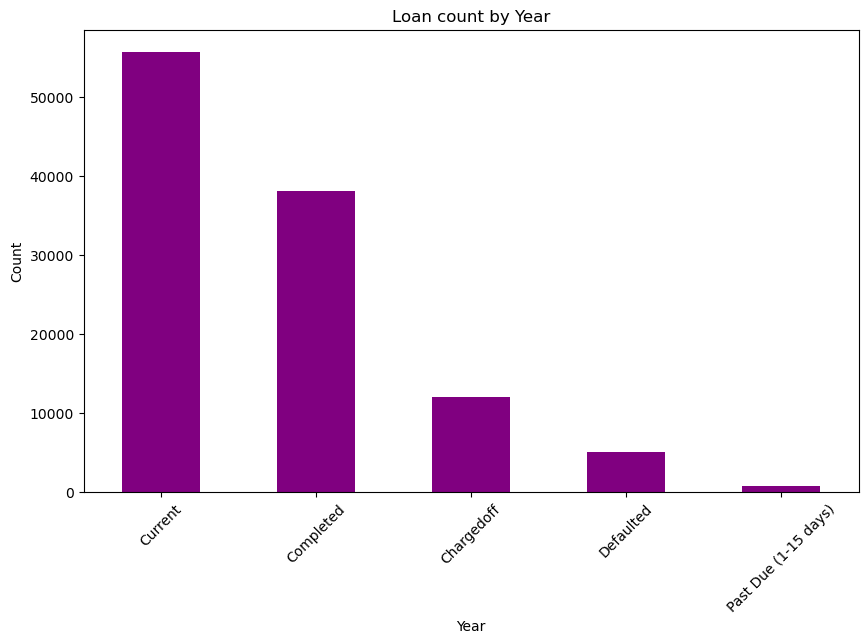

In [35]:
plt.figure(figsize=(10, 6))
loan_status.plot(kind='bar', color='#800080')
plt.title('Loan count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

7. Which states borrowed most?

In [36]:
#calculating the top 5 borrower by state
state = loandata["BorrowerState"].value_counts().head(5)
state

BorrowerState
CA    14594
TX     6786
FL     6667
NY     6660
IL     5872
Name: count, dtype: int64

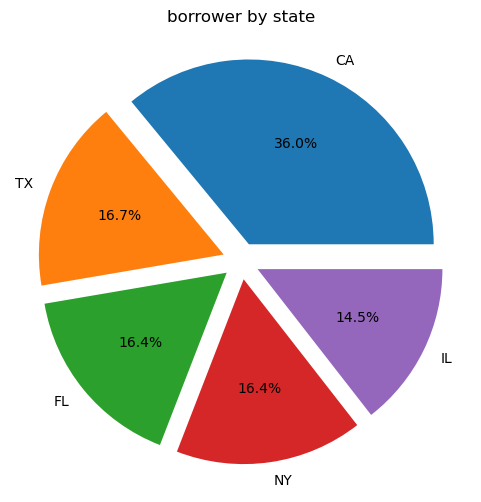

In [37]:
plt.figure(figsize=(6, 6))
plt.pie(state, labels=state.index,autopct='%1.1f%%', explode= [0.1] * len(state) )
plt.title("borrower by state")
plt.show()

8. What is the sum of borrower rate per term?

In [38]:
# Group the data by 'Term' and calculate the sum of 'BorrowerRate' for each term
sum_br= loandata.groupby('Term')['BorrowerRate'].sum().reset_index()
sum_br

,Term,BorrowerRate
0,12,242.23020
1,36,16892.92075
2,60,4680.45240


C:\Users\FEMICODE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FEMICODE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


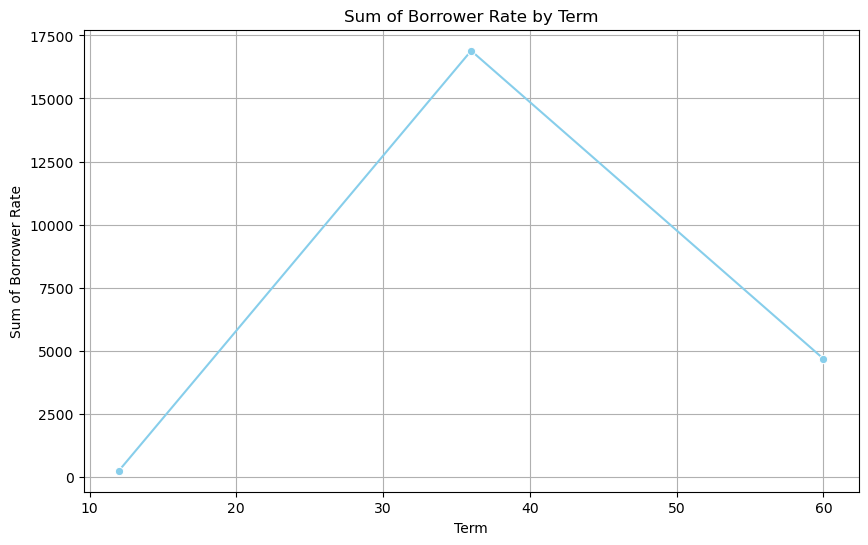

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sum_br, x='Term', y='BorrowerRate', marker='o', color='skyblue')
plt.title('Sum of Borrower Rate by Term')
plt.xlabel('Term')
plt.ylabel('Sum of Borrower Rate')
plt.grid(True)  #for better readability
plt.show()

 9. Top 5 occupation by income range

In [40]:
# calculating Top 5 occupation by income range
#calculate the top 5 occupation
occupation = loandata.groupby("Occupation")["IncomeRange"].count()
top_5_occupation = occupation.sort_values(ascending=False).head(5)
top_5_occupation


Occupation
Other                  28422
Professional           13531
Computer Programmer     4442
Executive               4280
Teacher                 3729
Name: IncomeRange, dtype: int64

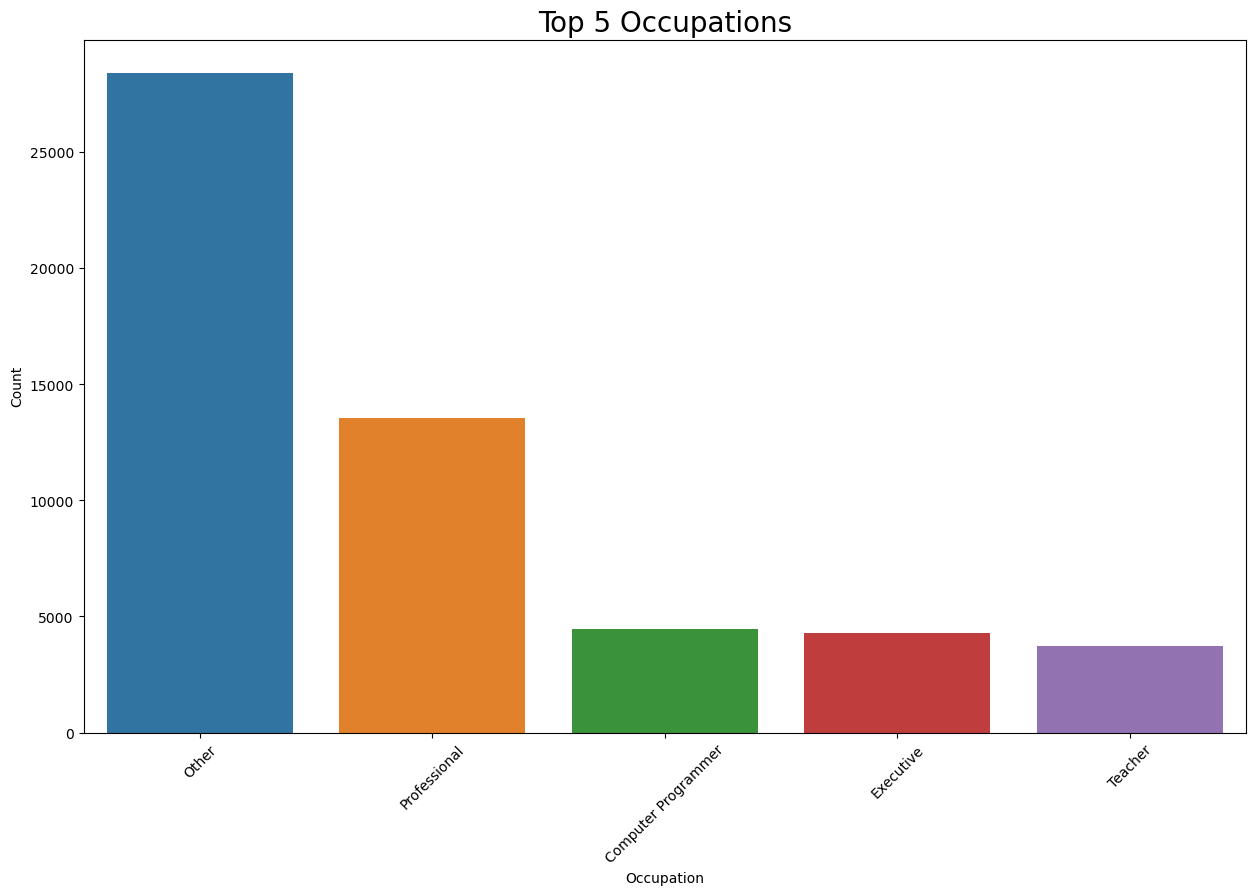

In [41]:
#visualize the data of the top 5 occupation 
plt.figure(figsize=(15, 9))
sns.barplot(x= top_5_occupation.index, y= top_5_occupation.values)
plt.xticks(rotation=45)
plt.title("Top 5 Occupations", fontdict={"fontsize": 20})
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

10. least 5 occupation

In [42]:
# calculating least 5 occupation by income range
#calculate the least 5 occupation
occupation = loandata.groupby("Occupation")["IncomeRange"].count()
least_5_occupation = occupation.sort_values(ascending=False).tail(5)
least_5_occupation


Occupation
Dentist                        67
Student - College Freshman     41
Student - Community College    28
Judge                          22
Student - Technical School     16
Name: IncomeRange, dtype: int64

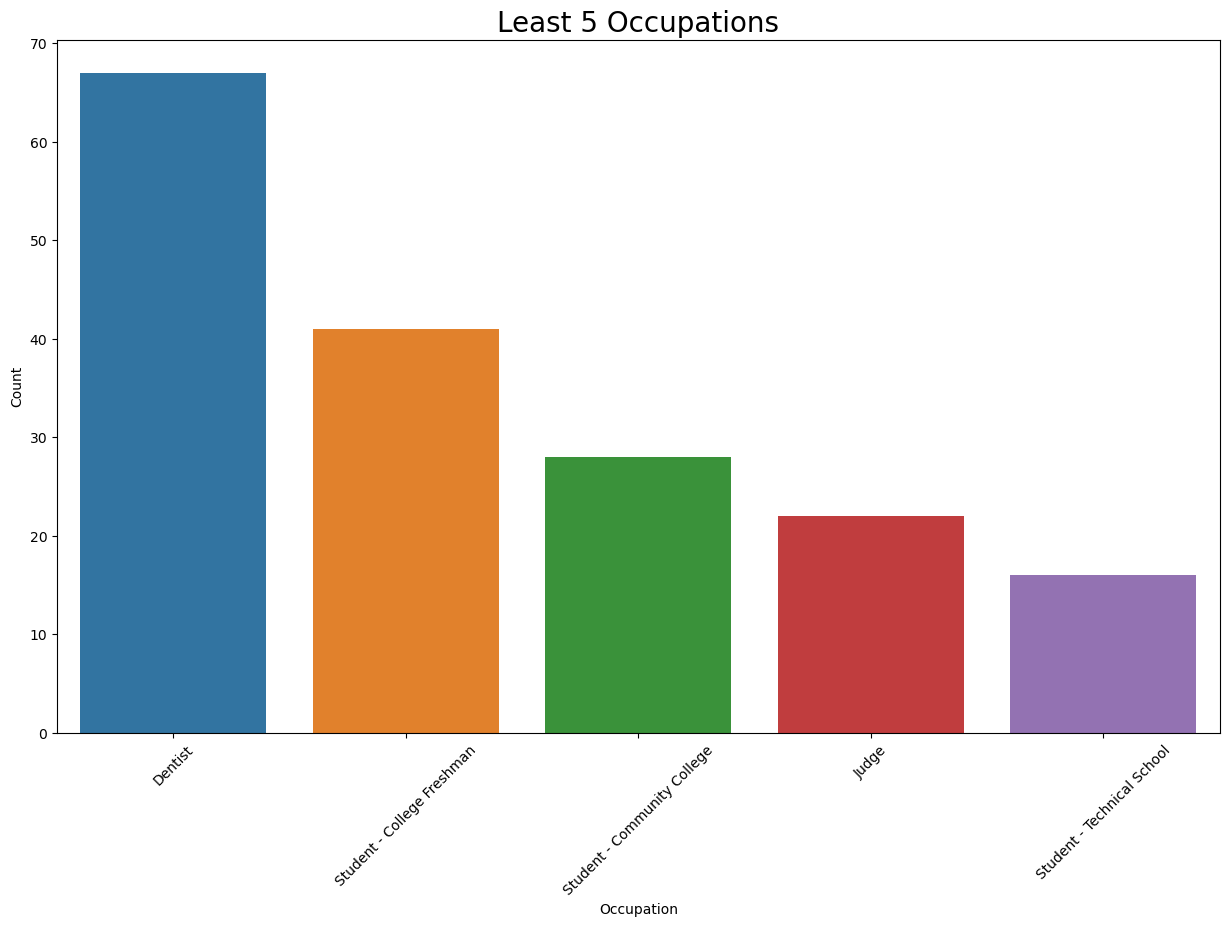

In [43]:
plt.figure(figsize=(15, 9))
sns.barplot(x= least_5_occupation.index, y= least_5_occupation.values)
plt.xticks(rotation=45)
plt.title("Least 5 Occupations", fontdict={"fontsize": 20})
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

11. The relationship between LoanStatus, 'ListingCategory (numeric)', 'LoanOriginalAmount'

C:\Users\FEMICODE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


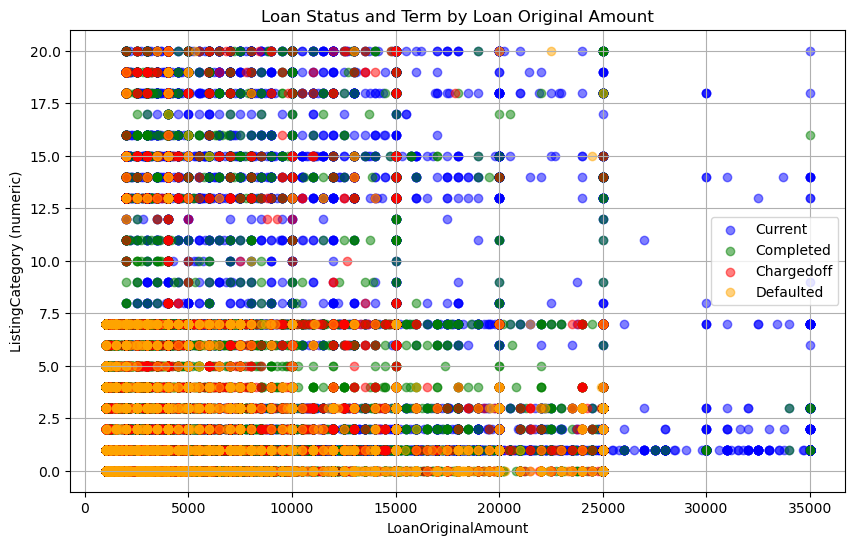

In [44]:
# to find the relationship betweenn loan status and terms
# Subset the data
subset_data = loandata[['LoanStatus', 'ListingCategory (numeric)', 'LoanOriginalAmount']]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Define colors for different loan statuses
colors = {'Current': 'blue', 'Completed': 'green', 'Chargedoff': 'red', 'Defaulted': 'orange'}

# Iterate over unique loan statuses and plot data points
for status, color in colors.items():
    subset_status = subset_data[subset_data['LoanStatus'] == status]
    plt.scatter(subset_status['LoanOriginalAmount'], subset_status['ListingCategory (numeric)'], color=color, label=status, alpha=0.5)

plt.xlabel('LoanOriginalAmount')
plt.ylabel('ListingCategory (numeric)')
plt.title('Loan Status and Term by Loan Original Amount')
plt.legend()
plt.grid(True)
plt.show()


relationship between LoanOriginalAmount and ListingCategory (numeric)

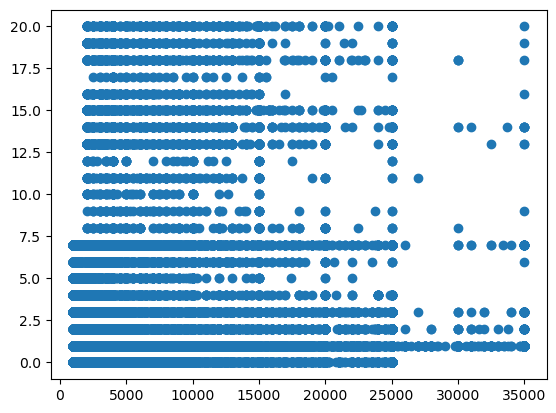

In [45]:
plt.scatter(loandata['LoanOriginalAmount'], loandata["ListingCategory (numeric)"])

12.  Is there any relationship between the borrower's annual percentage rate (BorrowerAPR) and their stated monthly income (StatedMonthlyIncome)?

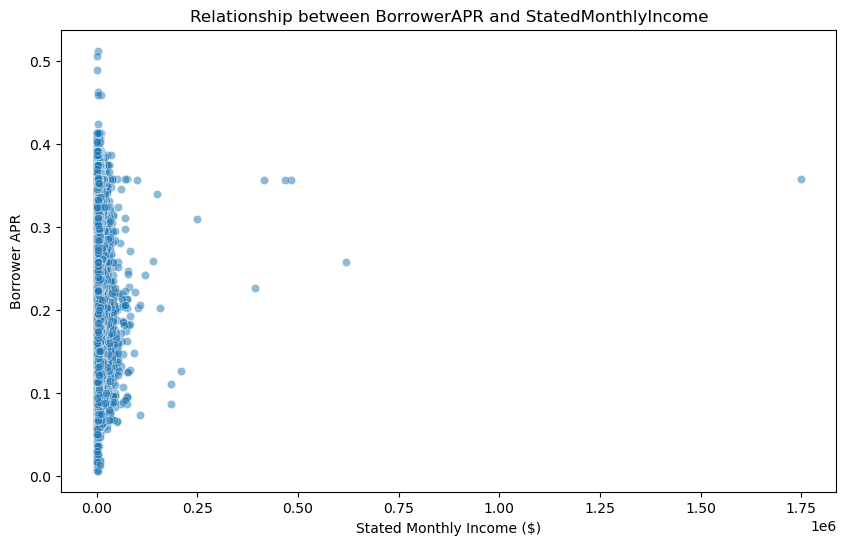

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loandata, x='StatedMonthlyIncome', y='BorrowerAPR', alpha=0.5)
plt.title('Relationship between BorrowerAPR and StatedMonthlyIncome')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Borrower APR')
plt.show()

13. How does the borrower's employment status (EmploymentStatus) affect their loan status (LoanStatus)? Are there certain employment statuses associated with higher rates of loan default or completion?

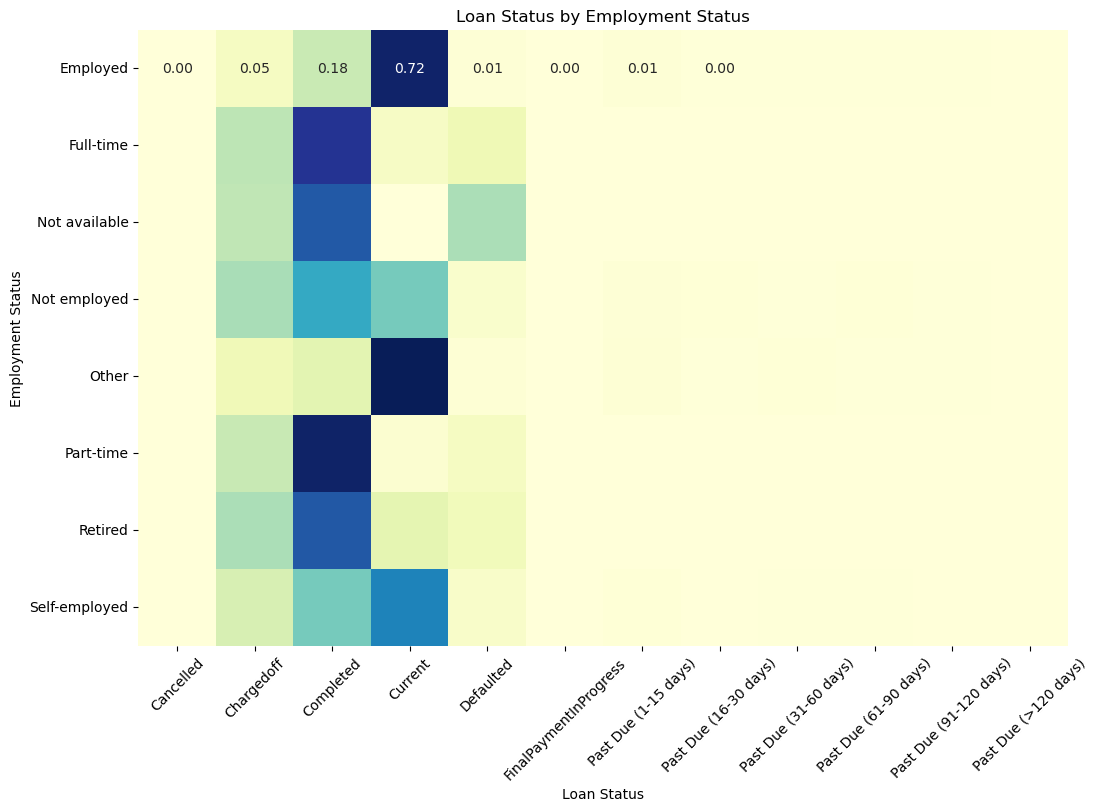

In [47]:
# Create a cross-tabulation of EmploymentStatus and LoanStatus
employment_loan_status = pd.crosstab(loandata['EmploymentStatus'], loandata['LoanStatus'], normalize='index')

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(employment_loan_status, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Loan Status by Employment Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

14. How does the borrower's stated monthly income (StatedMonthlyIncome) vary across different loan statuses (LoanStatus)? Are there differences in income levels for borrowers with different loan outcomes?

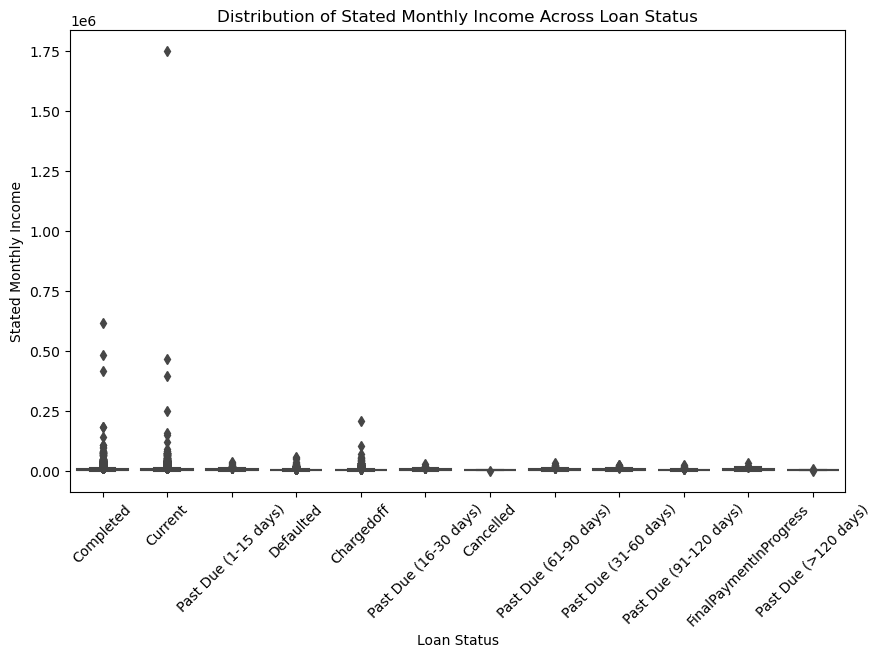

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loandata, x='LoanStatus', y='StatedMonthlyIncome')
plt.title('Distribution of Stated Monthly Income Across Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Stated Monthly Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

15.  How does the borrower's credit grade (CreditGrade) or credit score (if available) correlate with their loan status (LoanStatus) or loan outcome?

<Figure size 1200x800 with 0 Axes>

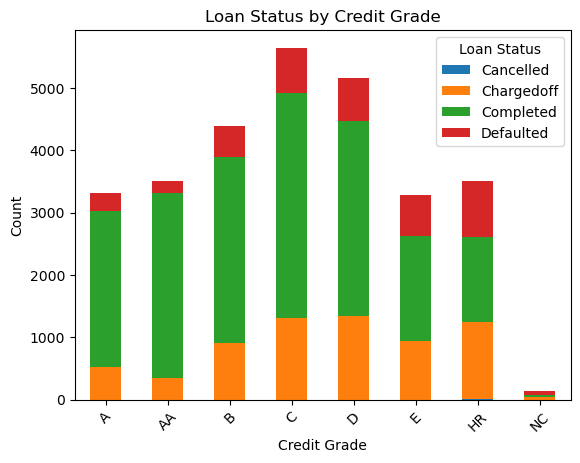

In [49]:
# Group the data by 'CreditGrade' and 'LoanStatus', and count the number of occurrences
credit_loan_status_counts = loandata.groupby(['CreditGrade', 'LoanStatus']).size().unstack(fill_value=0)

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
credit_loan_status_counts.plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status')
plt.show()

16.  Is there a relationship between the debt-to-income ratio (DebtToIncomeRatio) and loan outcomes (LoanStatus)? Do borrowers with higher debt-to-income ratios tend to have different loan outcomes compared to those with lower ratios?

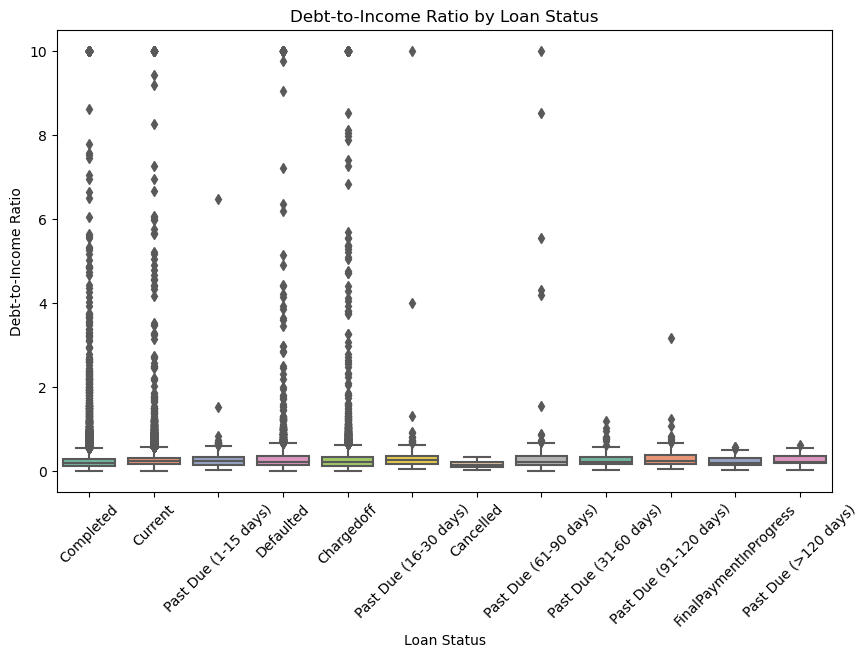

In [50]:
# Filter out NaN values from DebtToIncomeRatio column
filtered_data = loandata.dropna(subset=['DebtToIncomeRatio'])

# Create a box plot to compare debt-to-income ratios across different loan statuses
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='LoanStatus', y='DebtToIncomeRatio', palette='Set2')
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

17. Are there any geographical patterns in loan origination? For example, how does the distribution of borrowers vary across different states (BorrowerState)?

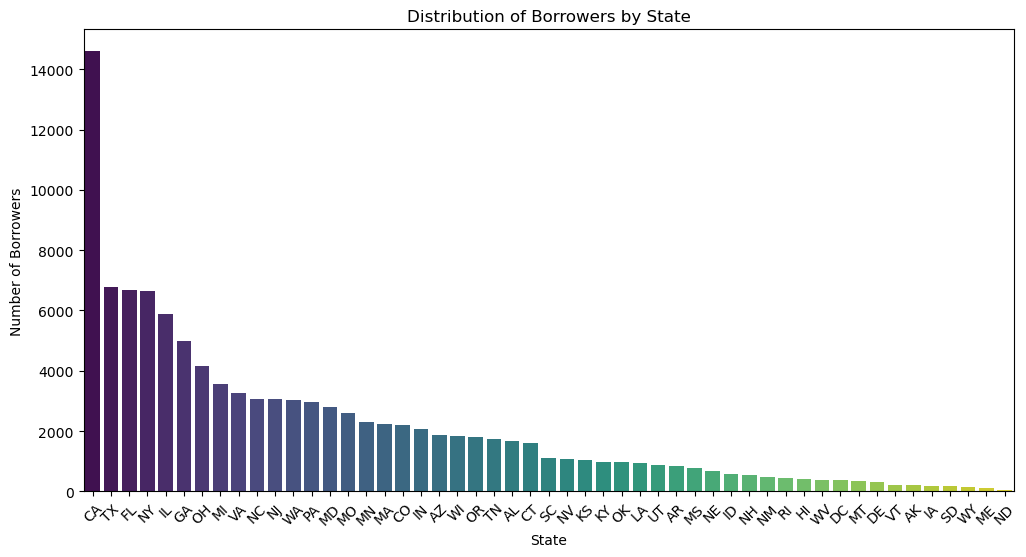

In [51]:
# Count the number of borrowers originating from each state
state_counts = loandata['BorrowerState'].value_counts()

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=loandata, x='BorrowerState', palette='viridis', order=state_counts.index)
plt.title('Distribution of Borrowers by State')
plt.xlabel('State')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

18.  What is the distribution of loan amounts (LoanOriginalAmount) across different income ranges (IncomeRange)? Are there any noticeable trends in borrowing behavior based on income level?

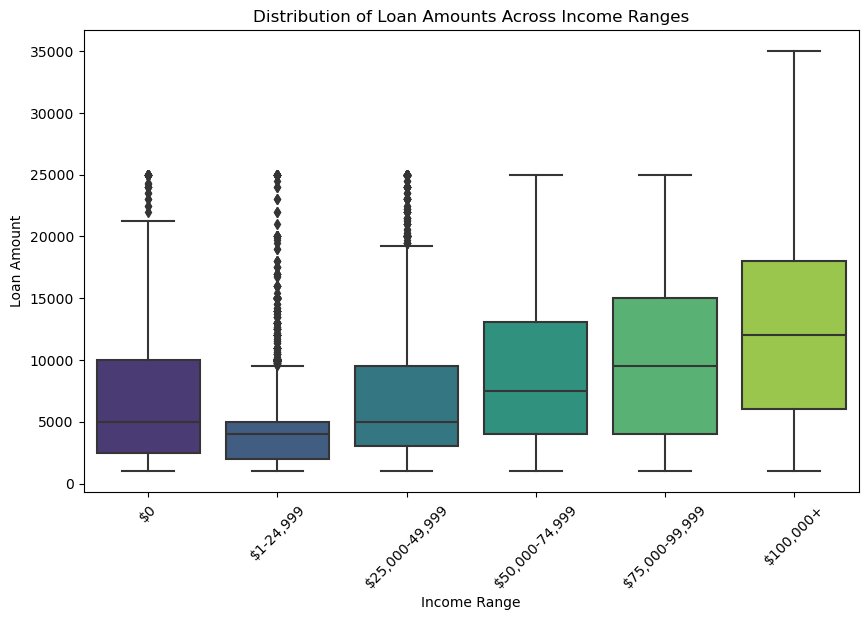

In [52]:
# Set the order of income ranges for plotting
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=loandata, x='IncomeRange', y='LoanOriginalAmount', order=income_order, palette='viridis')
plt.title('Distribution of Loan Amounts Across Income Ranges')
plt.xlabel('Income Range')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()